<a href="https://colab.research.google.com/github/kenneth-craig/academyPub/blob/main/Time%20Series%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
file = files.upload()


Saving shampoo-sales.csv to shampoo-sales.csv


# Time Series data being split into 'Year', 'Month & 'Day' and plotted
**Explore the Distribution of observations with histograms & density plots**

How to explore the +ve/-ve temporal relationships with line plots

How to manipulate Time Series data with panda series & data frames

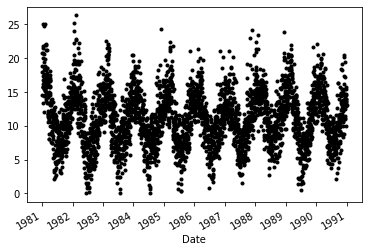

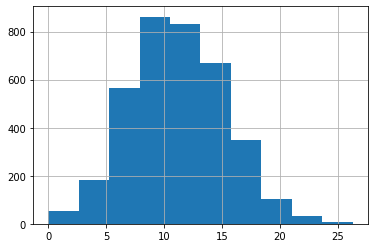

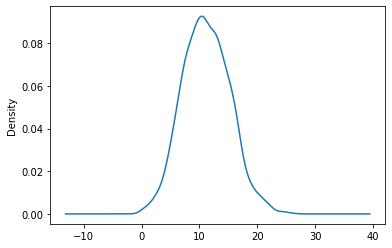

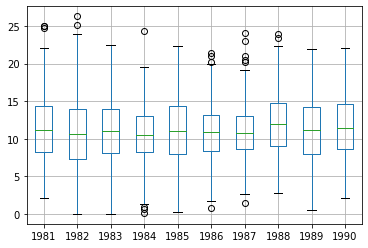

In [ ]:
import pandas as pd
from matplotlib import pyplot

series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df = pd.DataFrame()

# Split data so transposed by year, month, day & temperature
df['year'] = [series.index[i].year for i in range(len(series))]
df['month'] = [series.index[i].month for i in range(len(series))]
df['day'] = [series.index[i].day for i in range(len(series))]
df['temperature'] = [series[i] for i in range(len(series))]

# Line/dot plot
# Plot using 'dots' instead of joining each point up with a line (line plot)
series.plot(style='k.')
pyplot.show()

# Histogram
# Produces the best possible histogram with the area under the curve equal to 1 i.e. probability density curve
# The histogram algorithm automatically selects the size of the bins (bar width) based on the spread of the 
# values in the data
series.hist()
pyplot.show()

# Density Plots (kde & Gaussian)
#series.plot(kind='kde')
series.plot.density()
pyplot.show()

# Box & Whisker Plot
# Box is drawn around the 25th & 75th percentiles of the data that captures the middle 50% of observations
# A line is drawn at the 50th percentile (the median)
# Whiskers are drawn above & below the box to summarize the general extents of the observations
# Dots/circles are drawn for outliers outside of the whiskers/extents of the data

# Group data into years & plot as box/whiskers plot
# pd.Grouper values are A:Annual, M:Monthly, D:Daily)
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
  years[name.year] = group.values
years.boxplot()
pyplot.show()


# Box Plot for 1 Year Showing Monthly plot data
**How to Explore the change in distribution of observations with box, whisker & heat map plots**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


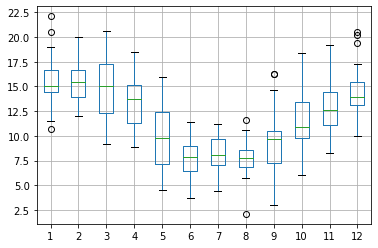

In [ ]:
# Create a boxplot of monthly data
import pandas as pd
from matplotlib import pyplot
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

one_year = series['1990']
# Group by Monthly
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months.boxplot()
pyplot.show()


# Heat Map Representation of Data

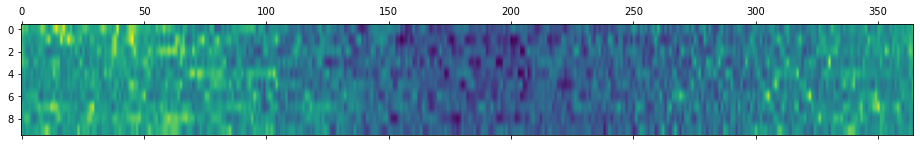

In [ ]:
import pandas as pd
from matplotlib import pyplot

# Years represented by rows & Days represetned by Columns in the plot
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# Group by A:Annual
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
  years[name.year] = group.values
years = years.T

pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


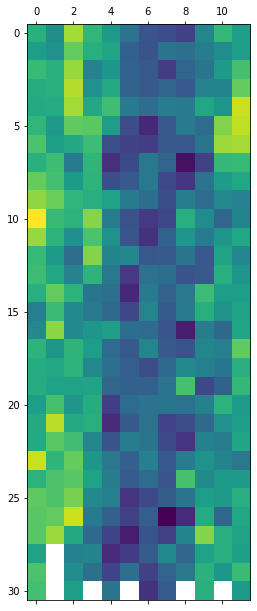

In [ ]:
import pandas as pd
from matplotlib import pyplot
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.column = range(1,13)

pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()


# Lag Scatter Pots - Correlation Within Last 7 Days
**How to Explore the temporal relationship with line, scatter & autocorrelation plots**

1


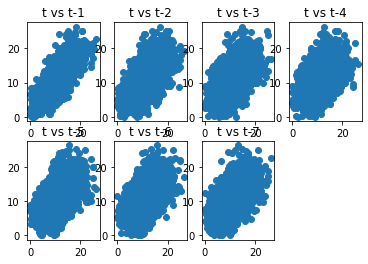

In [ ]:
import pandas as pd
from matplotlib import pyplot

series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = pd.DataFrame(series.values)
lags = 7

# columns is a list object, a temp object to build y-axis columns 't-1 thro 't-7'
columns = [values]

# Prepare data for y-axis, x-axis is original t-series data
# x-axis is column 't'
# y-axis is column 't-1', 't-2', 't-3', 't-4', 't-5', 't-6' & 't-7'
for i in range(1,(lags+1)):
  columns.append(values.shift(i))
df = pd.concat(columns, axis=1)

# Now prepare column labels for df
columns = ['t']
print(len(columns))
for i in range(1,(lags+1)):
  columns.append('t-' + str(i))
df.columns = columns

pyplot.figure(1)
# Build subplots: t-1, t-2, t-3, t-4, t-5, t-6 & t-7
# t is plotted on x-axis, t-n is plotted on y-axis
for i in range(1,(lags+1)):
  ax = pyplot.subplot(240 + i)
  ax.set_title('t vs t-' + str(i))
  pyplot.scatter(x=df['t'].values, y=df['t-'+str(i)].values)
pyplot.show()


# Autocorrelation Plots
Plots the strength & direction of temporal relationships & how relationships change over the lag

i.e. sinewaves like this are a strong sign of seasonality in the dataset (-ve indicates correlation in opposite seasons while +ve indicates correlation in the same season)


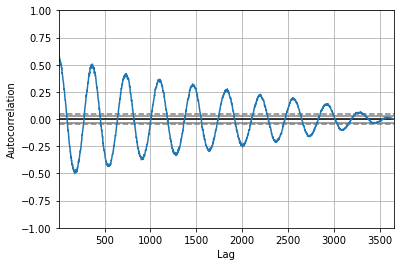

In [ ]:
import pandas as pd
from matplotlib import pyplot

series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

pd.plotting.autocorrelation_plot(series)
pyplot.show()


# Resampling

**Upsampling - fitting in the missing gaps**

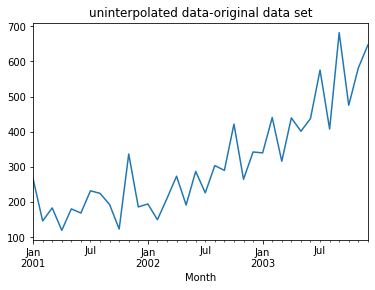

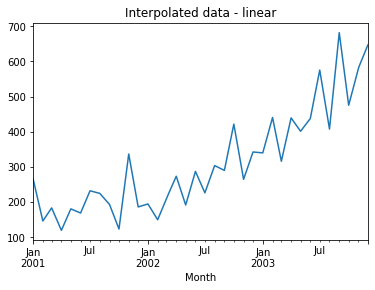

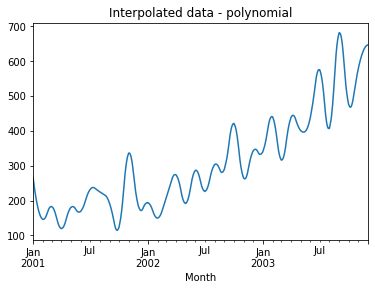

In [16]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot

def parser(x):
  return dt.datetime.strptime('200'+x, '%Y-%m')

series = pd.read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
  
upsampled = series.resample('D').mean()
interpolate_linear = upsampled.interpolate(method='linear')
interpolate_spline = upsampled.interpolate(method='spline', order=2)

# Plot based on straight line - no interpolated data
ax = series.plot()
ax.set_title('uninterpolated data-original data set')
pyplot.show()

# Plot based on straight line interplolated data - linear
ax = interpolate_linear.plot()
ax.set_title('Interpolated data - linear')
pyplot.show()

# Plot based on polynomial expression i.e. curved line
ax = interpolate_spline.plot()
ax.set_title('Interpolated data - polynomial')
pyplot.show()


**Downsampling - Less often**

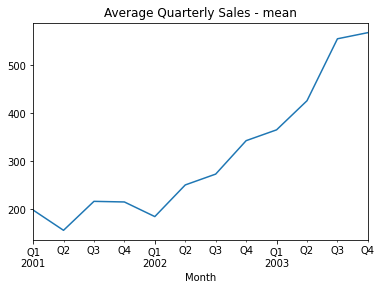

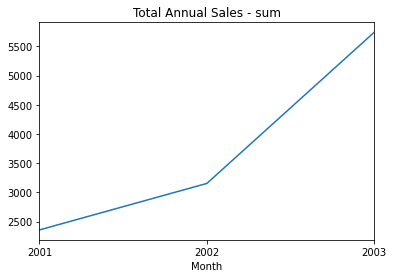

In [23]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot

def parser(x):
  return dt.datetime.strptime('200'+x, '%Y-%m')

series = pd.read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

downsample_quarterly = series.resample('Q')
downsample_annual = series.resample('A')

quarterly_mean_sales = downsample_quarterly.mean()
annual_mean_sales = downsample_annual.sum()

ax = quarterly_mean_sales.plot()
ax.set_title ('Average Quarterly Sales - mean')
pyplot.show()

ax = annual_mean_sales.plot()
ax.set_title('Total Annual Sales - sum')
pyplot.show()
